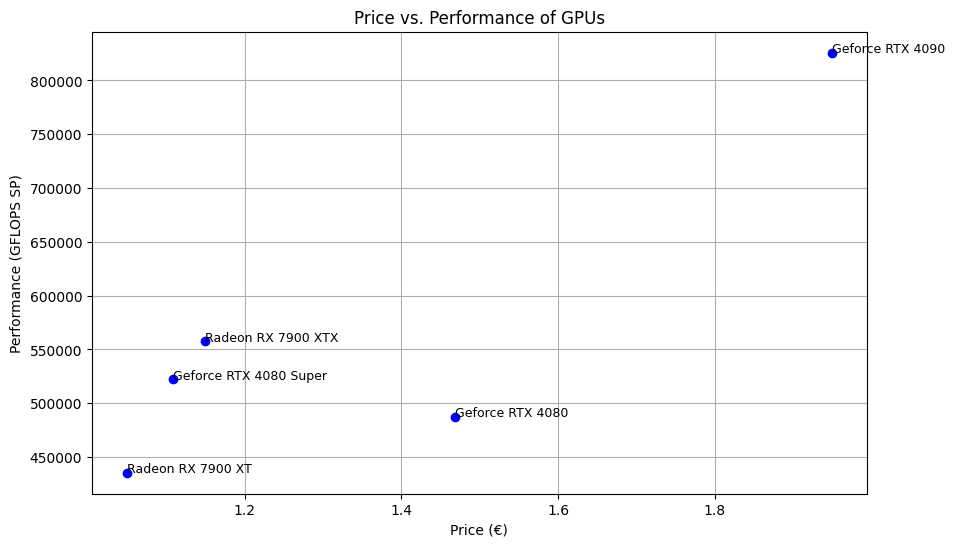

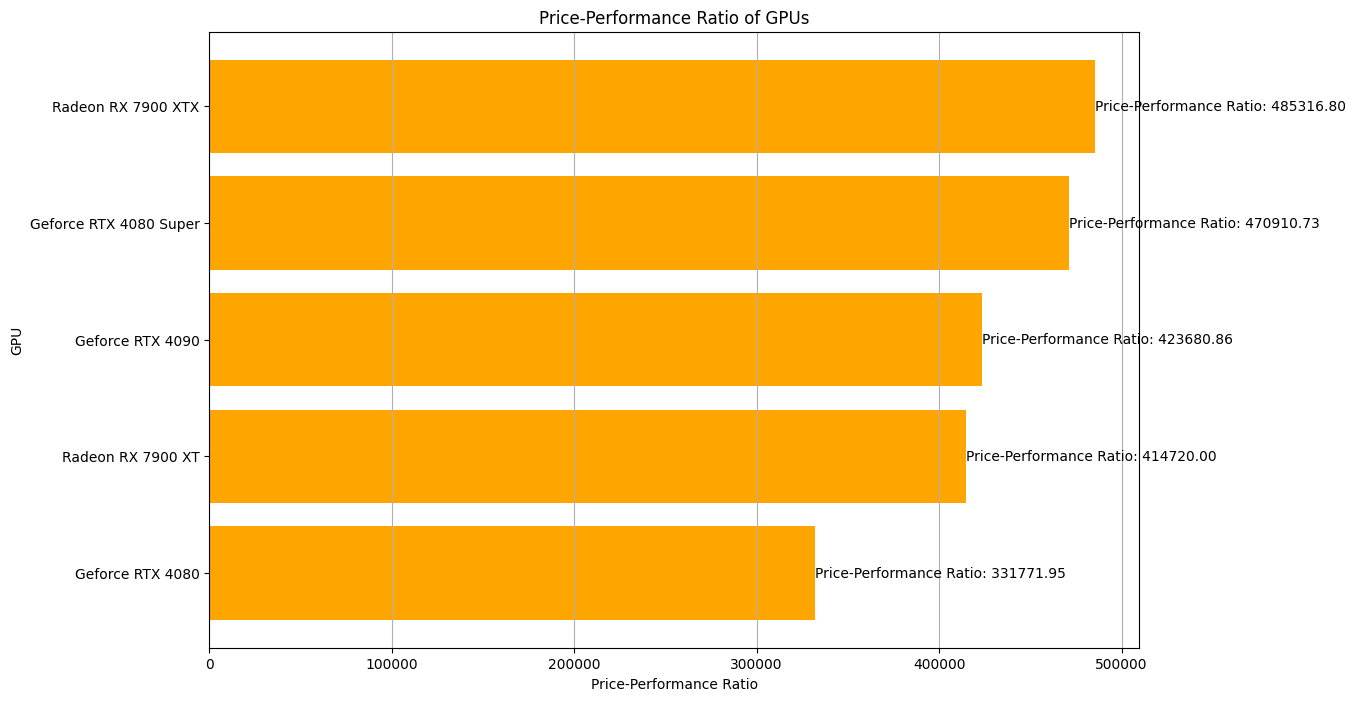

                     Name  Price (€)  Performance (GFLOPS SP)  \
0        Geforce RTX 4080      1.469                 487373.0   
1       Radeon RX 7900 XT      1.050                 435456.0   
2        Geforce RTX 4090      1.949                 825754.0   
3  Geforce RTX 4080 Super      1.109                 522240.0   
4      Radeon RX 7900 XTX      1.149                 557629.0   

   Price-Performance Ratio  
0            331771.953710  
1            414720.000000  
2            423680.861981  
3            470910.730388  
4            485316.797215  


In [9]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

# List of URLs to scrape
urls = [
    "https://www.pcgameshardware.de/Geforce-RTX-4090-Grafikkarte-279170/",
    "https://www.pcgameshardware.de/Radeon-RX-7900-XTX-Grafikkarte-279267/",
    "https://www.pcgameshardware.de/Geforce-RTX-4080-Super-Grafikkarte-280114/",
    "https://www.pcgameshardware.de/Geforce-RTX-4080-Grafikkarte-279483/",
    "https://www.pcgameshardware.de/Radeon-RX-7900-XT-Grafikkarte-279322/"
]

# Function to scrape data from a URL
def scrape_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    infobox = soup.find('div', class_='infobox_content')
    product_data = infobox.find_all('ul', class_='product_infobox_facts_cpu')

    data = {}
    for ul in product_data:
        items = ul.find_all('li')
        for item in items:
            dt = item.find('dt').text.strip()
            dd = item.find('dd').text.strip()
            data[dt] = dd

    return data

# Scrape data from all URLs
products = [scrape_data(url) for url in urls]

# Extract relevant data for sorting and plotting
names = [product["Name:"] for product in products]
prices = [float(product["UVP zum Release (€):"].replace('€', '').replace(',', '').strip()) for product in products]
performance = [float(product["GFLOPS SP"].replace(',', '').strip()) for product in products]

# Calculate price-performance ratio and sort by it
price_performance_ratio = [perf / price for perf, price in zip(performance, prices)]
sorted_indices = sorted(range(len(price_performance_ratio)), key=lambda k: price_performance_ratio[k])

# Sort the lists based on the calculated indices
sorted_names = [names[i] for i in sorted_indices]
sorted_prices = [prices[i] for i in sorted_indices]
sorted_performance = [performance[i] for i in sorted_indices]
sorted_price_performance_ratio = [price_performance_ratio[i] for i in sorted_indices]

# Plot the original price vs. performance scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prices, performance, color='blue')
for i, name in enumerate(names):
    plt.text(prices[i], performance[i], name, fontsize=9)

plt.title('Price vs. Performance of GPUs')
plt.xlabel('Price (€)')
plt.ylabel('Performance (GFLOPS SP)')
plt.grid(True)
plt.show()

# Plot the sorted price-performance diagram in a similar format to the provided image
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_names, sorted_price_performance_ratio, color='orange')

for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'Price-Performance Ratio: {bar.get_width():.2f}',
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.title('Price-Performance Ratio of GPUs')
plt.xlabel('Price-Performance Ratio')
plt.ylabel('GPU')
plt.grid(True, axis='x')
plt.show()

# Display sorted results
sorted_results = list(zip(sorted_names, sorted_prices, sorted_performance, sorted_price_performance_ratio))
df = pd.DataFrame(sorted_results, columns=['Name', 'Price (€)', 'Performance (GFLOPS SP)', 'Price-Performance Ratio'])
print(df)
